In [1]:
!pip install keras-tuner

In [2]:
!pip install tensorflow

In [3]:
!pip install blp

In [4]:
!pip install --index-url=https://bcms.bloomberg.com/pip/simple blpapi
#conda install -c conda-forge blpapi

Looking in indexes: https://bcms.bloomberg.com/pip/simple


In [5]:
pip install xbbg

Note: you may need to restart the kernel to use updated packages.


In [6]:
# Import necessary modules
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from datetime import date
import pandas as pd
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout
import keras_tuner as kt
from xbbg import blp


import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

import hashlib
import os

# Import necessary modules
from sklearn.model_selection import KFold, cross_val_score, train_test_split
from sklearn.metrics import r2_score,mean_squared_error,accuracy_score, recall_score, precision_score, f1_score, classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Keras specific
import tensorflow as tf

from tensorflow.keras.models import Sequential,load_model, Model
from tensorflow.keras.layers import SimpleRNN, Bidirectional, BatchNormalization, Embedding, LSTM, Dense, GRU, Conv1D, GlobalMaxPool1D, MaxPool1D, MaxPooling1D, Dropout, Activation , Flatten , Input, concatenate
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.utils import to_categorical 
from tensorflow.keras import backend as K

In [7]:
tickers = input("Enter the Equity name. eg: AAPL US Equity\n")
#"AAPL US Equity"

Enter the Equity name. eg: AAPL US Equity
 AAPL US Equity


In [8]:
commands = "PX_LAST, PX_HIGH, PX_LOW, PX_VOLUME, TWITTER_SENTIMENT, TWITTER_NEG_SENTIMENT_COUNT, TWITTER_POS_SENTIMENT_COUNT, TWITTER_NEUTRAL_SENTIMENT_CNT, TWITTER_PUBLICATION_COUNT, NEWS_SENTIMENT_DAILY_AVG, NEWS_POS_SENTIMENT_COUNT, NEWS_NEG_SENTIMENT_COUNT, NEWS_NEUTRAL_SENTIMENT_COUNT, NEWS_PUBLICATION_COUNT"

In [10]:
start = input("Enter the start date in YYYY-MM-DD format")
#'2016-07-26'
a=input("Type YES if you want current date as end date or no for custom date")
 
if a=="YES":
    end=str(date.today())
else:
    end = str(input("Enter the end date in YYYY-MM-DD format"))
#'2021-07-26'

Enter the start date in YYYY-MM-DD format 2016-07-26
Type YES if you want current date as end date or no for custom date YES


In [11]:
filename = hashlib.md5(''.join((tickers,"+",
          commands,"+",
          start,"+",
          end)).encode('utf-8')).hexdigest()
 
if os.path.exists(filename+'.csv'):
    data = pd.read_csv(filename+".csv", header=[0, 1],
    parse_dates=True,
    index_col=0)
else:
    data = blp.bdh(tickers=tickers.split(', ') , flds=commands.split(', '), start_date=start,  end_date=end,Per='D', Fill='P', Days='A', adjust='all')
    data.to_csv(filename+".csv")
   
df = data[tickers]
df

,PX_LAST,PX_HIGH,PX_LOW,PX_VOLUME,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_PUBLICATION_COUNT,NEWS_SENTIMENT_DAILY_AVG,NEWS_POS_SENTIMENT_COUNT,NEWS_NEG_SENTIMENT_COUNT,NEWS_NEUTRAL_SENTIMENT_COUNT,NEWS_PUBLICATION_COUNT
2016-07-26,22.198,22.496,22.140,224959288.0,944.0,575.0,6051.0,8482.0,-0.0378,14.0,68.0,296.0,2346.0
2016-07-27,23.640,23.961,23.594,369379280.0,5913.0,3793.0,15074.0,27091.0,-0.2728,162.0,324.0,458.0,5131.0
2016-07-28,23.959,23.984,23.610,159479356.0,1057.0,2828.0,8466.0,14479.0,-0.0964,140.0,163.0,419.0,4259.0
2016-07-29,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0,-0.0155,45.0,57.0,379.0,2575.0
2016-07-30,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0,-0.0155,45.0,57.0,379.0,2575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-04,219.860,225.600,217.710,105568560.0,57.0,203.0,367.0,1088.0,0.2493,176.0,110.0,272.0,2132.0
2024-08-05,209.270,213.500,196.000,119548589.0,54.0,15.0,211.0,452.0,-0.0941,14.0,36.0,104.0,965.0
2024-08-06,207.230,209.990,201.070,69660488.0,93.0,15.0,323.0,585.0,-0.1954,10.0,152.0,281.0,1350.0
2024-08-07,209.820,213.640,206.390,63516417.0,63.0,8.0,270.0,493.0,-0.0719,2.0,53.0,166.0,966.0


In [12]:
#calculated the technical indicators and also filling the null values in calculations using the bfill. Also made sure that the index is same for df and ti_df
def get_technical_indicators(dataset):
    # Create 7 and 21 days Moving Average
    dataset.loc[:, 'ma7'] = dataset['PX_LAST'].rolling(window=7).mean()
    dataset.loc[:, 'ma21'] = dataset['PX_LAST'].rolling(window=21).mean()
    # Create MACD
    dataset.loc[:, '26ema'] = dataset['PX_LAST'].ewm(span=26).mean()
    dataset.loc[:, '12ema'] = dataset['PX_LAST'].ewm(span=12).mean()
    dataset.loc[:, 'MACD'] = (dataset['12ema']-dataset['26ema'])
    # Create Bollinger Bands
    dataset.loc[:, '20sd'] = dataset['PX_LAST'].rolling(20).std()
    dataset.loc[:, 'upper_band'] = dataset['ma21'] + (dataset['20sd']*2)
    dataset.loc[:, 'lower_band'] = dataset['ma21'] - (dataset['20sd']*2)
    # Create Exponential moving average
    dataset.loc[:, 'ema'] = dataset['PX_LAST'].ewm(com=0.5).mean()
    # Create Momentum
    dataset.loc[:, 'momentum'] = dataset['PX_LAST']-1
    return dataset

In [13]:
ti_df = get_technical_indicators(df[['PX_LAST']].copy()).fillna(method='bfill')
ti_df.index = pd.DatetimeIndex(df.index)
ti_df

C:\Users\BS23895\AppData\Local\Temp\ipykernel_2324\3347341200.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  ti_df = get_technical_indicators(df[['PX_LAST']].copy()).fillna(method='bfill')


,PX_LAST,ma7,ma21,26ema,12ema,MACD,20sd,upper_band,lower_band,ema,momentum
2016-07-26,22.198,23.705000,24.442381,22.198000,22.198000,0.000000,0.704442,25.454658,23.430104,22.198000,21.198
2016-07-27,23.640,23.705000,24.442381,22.946731,22.979083,0.032353,0.704442,25.454658,23.430104,23.279500,22.640
2016-07-28,23.959,23.705000,24.442381,23.310429,23.361545,0.051116,0.704442,25.454658,23.430104,23.749923,22.959
2016-07-29,23.929,23.705000,24.442381,23.483355,23.540668,0.057314,0.704442,25.454658,23.430104,23.870800,22.929
2016-07-30,23.929,23.705000,24.442381,23.586702,23.646177,0.059475,0.704442,25.454658,23.430104,23.909760,22.929
...,...,...,...,...,...,...,...,...,...,...,...
2024-08-04,219.860,219.580000,222.435714,220.839584,220.237393,-0.602191,4.457223,231.350161,213.521267,219.835986,218.860
2024-08-05,209.270,218.298571,221.239048,219.982578,218.550102,-1.432476,4.194148,229.627343,212.850753,212.791995,208.270
2024-08-06,207.230,216.645714,219.925238,219.037942,216.808547,-2.229395,4.697463,229.320164,210.530313,209.083998,206.230
2024-08-07,209.820,214.894286,219.017619,218.355132,215.733386,-2.621745,5.026772,229.071163,208.964075,209.574666,208.820


In [14]:
# Define the target column
target_column = ['PX_LAST']
print("The target variable is PX_LAST")
# Define predictor columns
predictors = list(set(list(df.columns)) - set(target_column))

The target variable is PX_LAST


In [15]:
# Split the data into features and target
X = df[predictors].values
y = df[target_column].values

In [16]:
X

array([[ 6.80000000e+01, -3.78000000e-02,  2.96000000e+02, ...,
         2.21400000e+01,  9.44000000e+02,  2.24959288e+08],
       [ 3.24000000e+02, -2.72800000e-01,  4.58000000e+02, ...,
         2.35940000e+01,  5.91300000e+03,  3.69379280e+08],
       [ 1.63000000e+02, -9.64000000e-02,  4.19000000e+02, ...,
         2.36100000e+01,  1.05700000e+03,  1.59479356e+08],
       ...,
       [ 1.52000000e+02, -1.95400000e-01,  2.81000000e+02, ...,
         2.01070000e+02,  9.30000000e+01,  6.96604880e+07],
       [ 5.30000000e+01, -7.19000000e-02,  1.66000000e+02, ...,
         2.06390000e+02,  6.30000000e+01,  6.35164170e+07],
       [ 5.30000000e+01, -7.19000000e-02,  1.66000000e+02, ...,
         2.06390000e+02,  6.30000000e+01,  4.33920000e+04]])

In [17]:
y

array([[ 22.198],
       [ 23.64 ],
       [ 23.959],
       ...,
       [207.23 ],
       [209.82 ],
       [209.82 ]])

In [18]:
# Define the numerical pipeline
numerical_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [19]:
# Fit the pipeline on the features and transform them
X_transformed = numerical_pipeline.fit_transform(X)

In [20]:
X_transformed

array([[ 0.57154214, -0.35281961,  0.1367064 , ..., -1.33245877,
         2.8522049 ,  2.04186394],
       [ 4.52206833, -2.88420221,  0.94464308, ..., -1.30758499,
        19.99728716,  4.55303546],
       [ 2.03755772, -0.98404948,  0.7501398 , ..., -1.30731128,
         3.24210112,  0.90330038],
       ...,
       [ 1.86780855, -2.05046173,  0.06189744, ...,  1.72852146,
        -0.08409314, -0.65846804],
       [ 0.340066  , -0.72013938, -0.51163786, ...,  1.81953144,
        -0.18760541, -0.76530101],
       [ 0.340066  , -0.72013938, -0.51163786, ...,  1.81953144,
        -0.18760541, -1.86896851]])

In [21]:
# Normalize the target variable
scaler = MinMaxScaler(feature_range=(0, 1))
y_scaled = scaler.fit_transform(y)

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_scaled, test_size=0.1, random_state=123, shuffle=False)
split_time = X_train.shape[0]

In [23]:
# Reshape data for LSTM/GRU input
X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
 
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(2642, 1, 12) (2642, 1) (294, 1, 12) (294, 1)


In [24]:
# Define the LSTM model
def create_lstm(X_train, regress=False):
    model = Sequential()
    model.add(LSTM(units=32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(LSTM(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(LSTM(units=512))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [25]:
modelName = "./LSTM"
if not os.path.exists(modelName + "/model.h5"):
    model_lstm = create_lstm(X_train, regress=False)
    model_lstm.compile(loss='mae', optimizer='adam')
    history_lstm = model_lstm.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test), shuffle=False)
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)
    model_lstm.save(modelName + ".weights.h5")
    model_lstm.save_weights(modelName + "model.weights.h5")
else:
    model_lstm = load_model(modelName+ ".weights.h5")
    model_lstm.load_weights(modelName + 'model.weights.h5')
    model_lstm.compile(loss='mae', optimizer='adam')
    scores_lstm = model_lstm.evaluate(X_train, y_train, verbose=0)
 
print(model_lstm.summary())
print('')

C:\Users\BS23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0309 - val_loss: 0.0897
Epoch 2/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3144 - val_loss: 0.0371
Epoch 3/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.2727 - val_loss: 0.0193
Epoch 4/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.1263 - val_loss: 0.0320
Epoch 5/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0977 - val_loss: 0.0200
Epoch 6/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0811 - val_loss: 0.0264
Epoch 7/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0607 - val_loss: 0.0291
Epoch 8/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0463 - val_loss: 0.0194
Epoch 9/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0456 - val_loss: 0.0231
Epoch 10/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0433 - val_loss: 0.0210
Epoch 11/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0328 - val_loss: 0.0274
Epoch 12/100
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 1, 32)          │         5,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 1, 128)         │        82,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 512)            │     1,312,768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,204,421 (16.04 MB)

 Trainable params: 1,401,473 (5.35 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,802,948 (10.69 MB)

None



In [26]:
# Define the GRU model
def create_gru(X_train, regress=False):
    model = Sequential()
    model.add(GRU(units=32, activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    model.add(GRU(units=128, return_sequences=True))
    model.add(Dropout(0.2))
    model.add(GRU(units=512))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    return model

In [27]:
modelName = "./GRU"
if not os.path.exists(modelName+"/model.h5"):
    model_gru = create_gru(X_train, regress=False)
    model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train, y_train, epochs = 15,batch_size=32, validation_data = (X_test, y_test), shuffle=False)
    scores_gru = model_gru.evaluate(X_train, y_train, verbose=0)
    model_gru.save(modelName + ".weights.h5")
    # serialize weights to HDF5
    model_gru.save_weights(modelName+"model.weights.h5")
else:    
    model_gru = load_model(modelName + ".weights.h5")
    model_gru.load_weights(modelName+'model.weights.h5')
    results_gru = model_gru.compile(loss = 'mae', optimizer = 'adam')
    history_gru = model_gru.fit(X_train, y_train, epochs = 15,batch_size=32, validation_data = (X_test, y_test), shuffle=False)
    scores_gru= model_gru.evaluate(X_train, y_train, verbose=0)

print(model_gru.summary())
print('')


C:\Users\BS23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - loss: 0.0306 - val_loss: 0.0512
Epoch 2/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.2446 - val_loss: 0.0344
Epoch 3/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.1786 - val_loss: 0.0732
Epoch 4/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0994 - val_loss: 0.0628
Epoch 5/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0913 - val_loss: 0.0250
Epoch 6/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0782 - val_loss: 0.0481
Epoch 7/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0839 - val_loss: 0.0393
Epoch 8/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0716 - val_loss: 0.0505
Epoch 9/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0654 - val_loss: 0.0329
Epoch 10/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0664 - val_loss: 0.0142
Epoch 11/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 0.0613 - val_loss: 0.0536
Epoch 12/15
83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0640 - val_

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru (GRU)                       │ (None, 1, 32)          │         4,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1, 32)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_1 (GRU)                     │ (None, 1, 128)         │        62,208 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 1, 128)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_2 (GRU)                     │ (None, 512)            │       986,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,159,749 (12.05 MB)

 Trainable params: 1,053,249 (4.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,106,500 (8.04 MB)

None



In [28]:
# Evaluate the models
y_test = scaler.inverse_transform(y_test)
y_test = pd.DataFrame(y_test)
 
y_predicted_lstm = model_lstm.predict(X_test)
y_predicted_lstm = scaler.inverse_transform(y_predicted_lstm)
y_predicted_lstm = pd.DataFrame(y_predicted_lstm)
 
y_predicted_gru = model_gru.predict(X_test)
y_predicted_gru = scaler.inverse_transform(y_predicted_gru)
y_predicted_gru = pd.DataFrame(y_predicted_gru)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 143ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 4s 271ms/step


In [29]:
# Calculate MSE for LSTM and GRU predictions
mse_lstm = mean_squared_error(y_test, y_predicted_lstm)
mse_gru = mean_squared_error(y_test, y_predicted_gru)
 
# Calculate RMSE for LSTM and GRU predictions
rmse_lstm = np.sqrt(mse_lstm)
rmse_gru = np.sqrt(mse_gru)
 
# Print the evaluation metrics
print(f"LSTM Mean Squared Error (MSE): {mse_lstm}")
print(f"LSTM Root Mean Squared Error (RMSE): {rmse_lstm}")
print(f"GRU Mean Squared Error (MSE): {mse_gru}")
print(f"GRU Root Mean Squared Error (RMSE): {rmse_gru}")

LSTM Mean Squared Error (MSE): 265.38935393068533
LSTM Root Mean Squared Error (RMSE): 16.290775117553043
GRU Mean Squared Error (MSE): 103.00380934817791
GRU Root Mean Squared Error (RMSE): 10.149079236471549


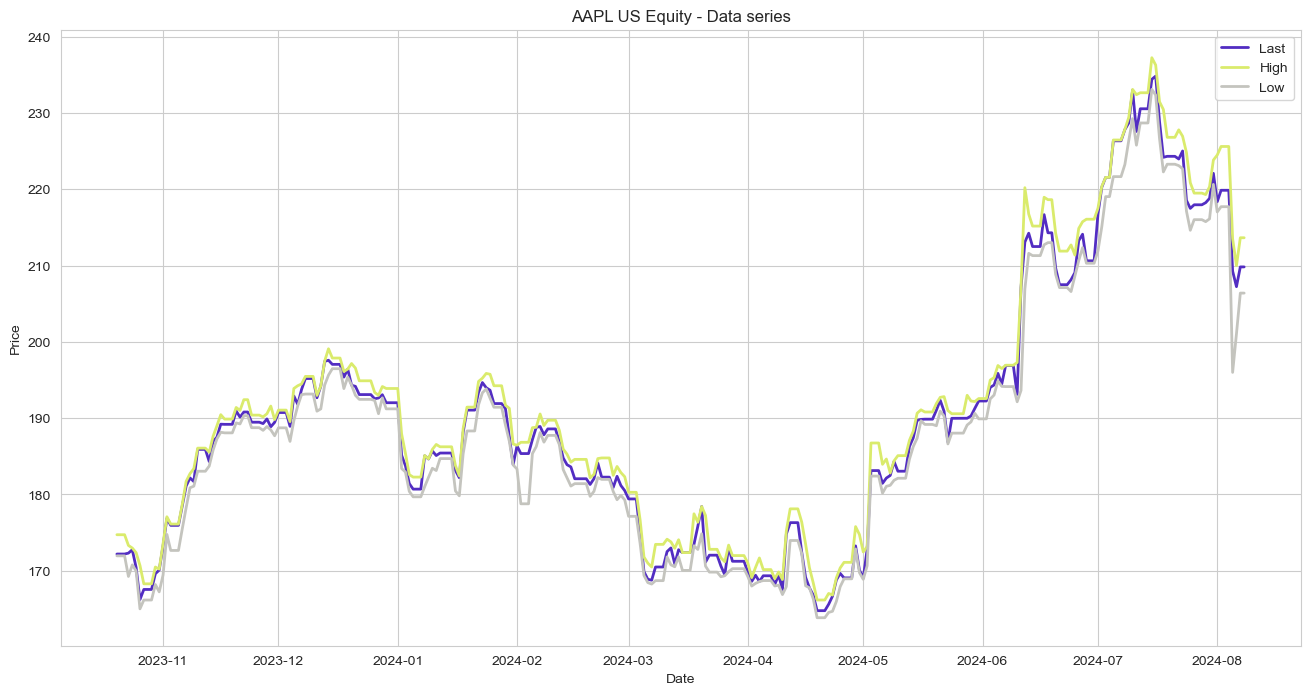

In [30]:
#Virtualization
 
color1 = "#522dc2"
color2 = "#daeb6c"
color3 = "#c4c4be"
 
dfname = tickers
 
#plotting last, high and low
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(df['PX_HIGH'][split_time:], lw=2, c=color2)
plt.plot(df['PX_LOW'][split_time:], lw=2, c=color3)
plt.legend(['Last','High', 'Low'])
 
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

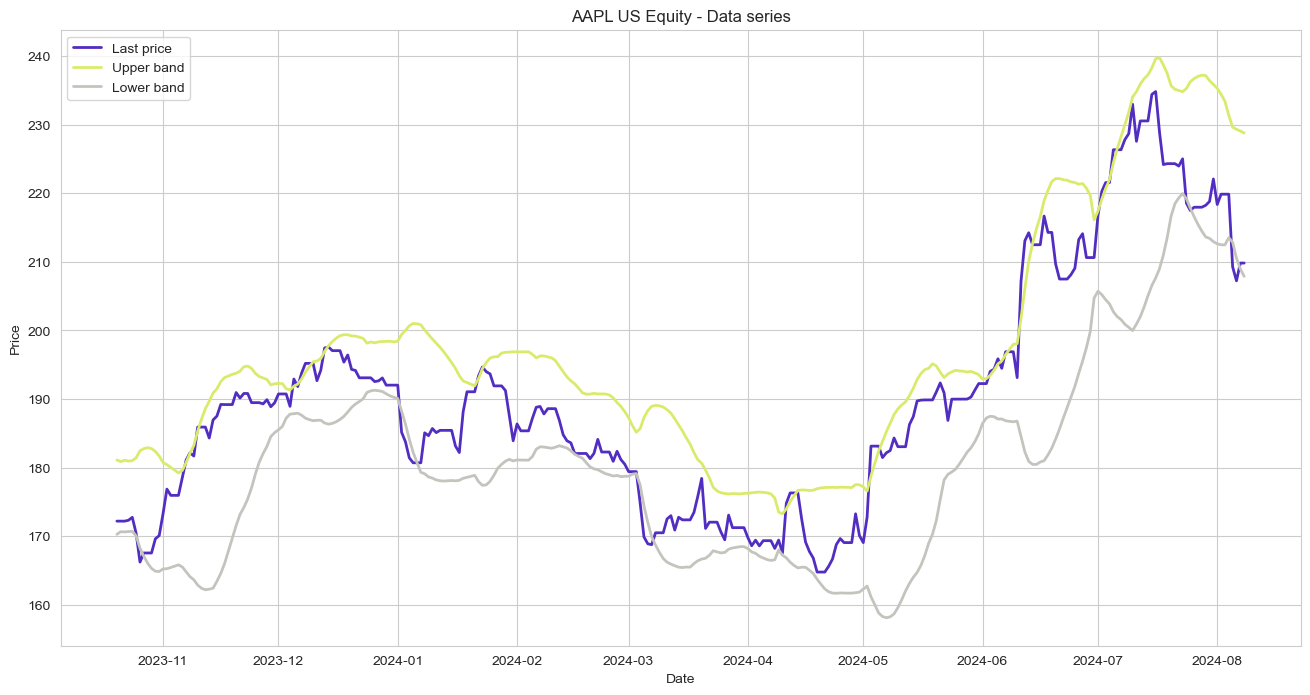

In [31]:
#plotting for last price, upper band and lower band
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['upper_band'][split_time:], lw=2, c=color2)
plt.plot(ti_df['lower_band'][split_time:], lw=2, c=color3)
plt.legend(['Last price','Upper band', 'Lower band'])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

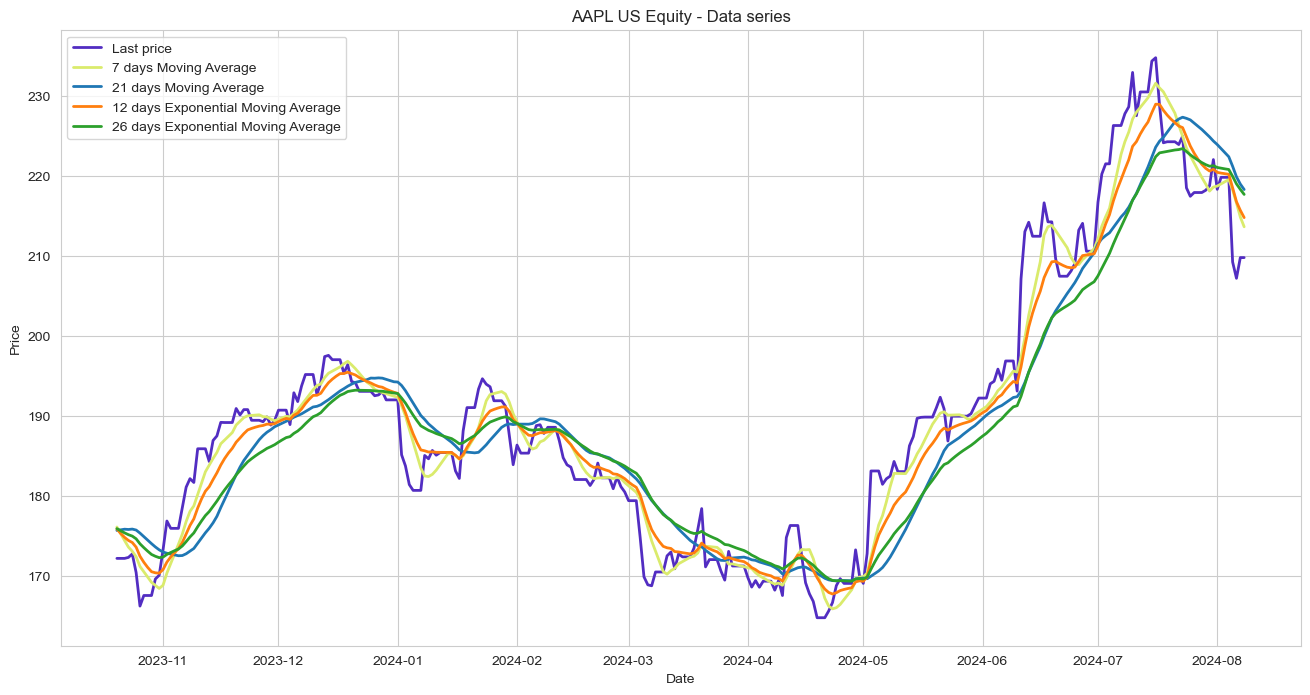

In [32]:
#plotting for Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average
plt.figure(figsize=(16,8))
plt.xlabel('Date')
plt.ylabel('Price')
plt.plot(ti_df['PX_LAST'][split_time:], lw=2, c=color1)
plt.plot(ti_df['ma7'][split_time:], lw=2, c=color2)
plt.plot(ti_df['ma21'][split_time:], lw=2)
plt.plot(ti_df['12ema'][split_time:], lw=2 )
plt.plot(ti_df['26ema'][split_time:], lw=2)
 
plt.legend(["Last price","7 days Moving Average","21 days Moving Average","12 days Exponential Moving Average", "26 days Exponential Moving Average"])
plt.title(dfname + ' - Data series')
plt.grid(True)
plt.show()

In [33]:
#Hyperparameter optimisation
def build_lstm_model(hp):
    model = Sequential()
    # Tune the number of units in the first LSTM layer
    model.add(LSTM(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second LSTM layer
    model.add(LSTM(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third LSTM layer
    model.add(LSTM(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model
tuner = kt.RandomSearch(
    build_lstm_model,
    objective='val_loss',
    max_trials=10,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='lstm_tuning'
)
 
# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))
 
best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 28s]
val_loss: 189.0665283203125

Best val_loss So Far: 189.0665283203125
Total elapsed time: 00h 07m 03s


C:\Users\BS23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\BS23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [34]:
def build_gru_model(hp):
    model = Sequential()
    # Tune the number of units in the first GRU layer
    model.add(GRU(units=hp.Int('units_1', min_value=32, max_value=512, step=32), activation='relu', return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
    model.add(Dropout(0.2))
    # Tune the number of units in the second GRU layer
    model.add(GRU(units=hp.Int('units_2', min_value=32, max_value=512, step=32), return_sequences=True))
    model.add(Dropout(0.2))
    # Tune the number of units in the third GRU layer
    model.add(GRU(units=hp.Int('units_3', min_value=32, max_value=512, step=32)))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    model.compile(optimizer='adam', loss='mae')
    return model

tuner = kt.RandomSearch(
    build_gru_model,
    objective='val_loss',
    max_trials=10,  # The number of different hyperparameter combinations to try
    executions_per_trial=1,  # Number of models to build and fit for each trial
    directory='my_dir',
    project_name='gru_tuning'
)

# Perform the hyperparameter search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

best_model = tuner.get_best_models(num_models=1)[0]

Trial 10 Complete [00h 00m 21s]
val_loss: 189.10157775878906

Best val_loss So Far: 189.0651092529297
Total elapsed time: 00h 05m 10s


C:\Users\BS23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
C:\Users\BS23895\AppData\Local\anaconda3\Lib\site-packages\keras\src\saving\saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 24 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [36]:
# Regression MOdels

In [61]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from scipy import stats
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import TimeSeriesSplit, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

%matplotlib inline

# Import the models
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor, ExtraTreesRegressor, BaggingRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error, r2_score

import warnings
warnings.filterwarnings('ignore')


In [37]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2642, 1, 12)
(2642, 1)
(294, 1, 12)
(294, 1)


In [38]:
print(X_train)
print(y_train)

[[[ 5.71542140e-01 -3.52819612e-01  1.36706396e-01 ... -1.33245877e+00
    2.85220490e+00  2.04186394e+00]]

 [[ 4.52206833e+00 -2.88420221e+00  9.44643079e-01 ... -1.30758499e+00
    1.99972872e+01  4.55303546e+00]]

 [[ 2.03755772e+00 -9.84049485e-01  7.50139803e-01 ... -1.30731128e+00
    3.24210112e+00  9.03300383e-01]]

 ...

 [[ 1.85748568e-01 -2.65567702e-01 -2.37338365e-01 ...  1.26733012e+00
   -1.73803776e-01 -8.69056230e-01]]

 [[-1.84613262e-01  2.65113494e-03 -1.02682251e-01 ...  1.27261623e+00
   -3.32522589e-01 -9.17481311e-01]]

 [[-2.30908491e-01 -2.73478547e-03 -3.32096371e-01 ...  1.27398480e+00
   -2.87667272e-01 -8.38566186e-01]]]
[[0.        ]
 [0.00678199]
 [0.0082823 ]
 ...
 [0.72548466]
 [0.71934701]
 [0.71756921]]


In [51]:
df

,PX_LAST,PX_HIGH,PX_LOW,PX_VOLUME,TWITTER_NEG_SENTIMENT_COUNT,TWITTER_POS_SENTIMENT_COUNT,TWITTER_NEUTRAL_SENTIMENT_CNT,TWITTER_PUBLICATION_COUNT,NEWS_SENTIMENT_DAILY_AVG,NEWS_POS_SENTIMENT_COUNT,NEWS_NEG_SENTIMENT_COUNT,NEWS_NEUTRAL_SENTIMENT_COUNT,NEWS_PUBLICATION_COUNT
2016-07-26,22.198,22.496,22.140,224959288.0,944.0,575.0,6051.0,8482.0,-0.0378,14.0,68.0,296.0,2346.0
2016-07-27,23.640,23.961,23.594,369379280.0,5913.0,3793.0,15074.0,27091.0,-0.2728,162.0,324.0,458.0,5131.0
2016-07-28,23.959,23.984,23.610,159479356.0,1057.0,2828.0,8466.0,14479.0,-0.0964,140.0,163.0,419.0,4259.0
2016-07-29,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0,-0.0155,45.0,57.0,379.0,2575.0
2016-07-30,23.929,24.007,23.807,110934752.0,451.0,591.0,6703.0,8809.0,-0.0155,45.0,57.0,379.0,2575.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-08-04,219.860,225.600,217.710,105568560.0,57.0,203.0,367.0,1088.0,0.2493,176.0,110.0,272.0,2132.0
2024-08-05,209.270,213.500,196.000,119548589.0,54.0,15.0,211.0,452.0,-0.0941,14.0,36.0,104.0,965.0
2024-08-06,207.230,209.990,201.070,69660488.0,93.0,15.0,323.0,585.0,-0.1954,10.0,152.0,281.0,1350.0
2024-08-07,209.820,213.640,206.390,63516417.0,63.0,8.0,270.0,493.0,-0.0719,2.0,53.0,166.0,966.0


In [52]:
# Create Dataframe for Adjusted Close prices

df_adj = df[['PX_LAST']]
df_adj 
#df_adj = df.copy()

,PX_LAST
2016-07-26,22.198
2016-07-27,23.640
2016-07-28,23.959
2016-07-29,23.929
2016-07-30,23.929
...,...
2024-08-04,219.860
2024-08-05,209.270
2024-08-06,207.230
2024-08-07,209.820


In [53]:
# A variable for predicting 'n' days into the future

forecast_out = 30

# Create column for target variable shifted 'n' days up
df_adj['Prediction'] = df_adj[['PX_LAST']].shift(-forecast_out)

df_adj

,PX_LAST,Prediction
2016-07-26,22.198,24.834
2016-07-27,23.640,24.689
2016-07-28,23.959,24.689
2016-07-29,23.929,24.689
2016-07-30,23.929,24.661
...,...,...
2024-08-04,219.860,NaN
2024-08-05,209.270,NaN
2024-08-06,207.230,NaN
2024-08-07,209.820,NaN


In [54]:
X = np.array(df_adj.drop(['Prediction'],axis = 1))
# Remove last 'n' rows
X = X[:-forecast_out]

print(X)

[[ 22.198]
 [ 23.64 ]
 [ 23.959]
 ...
 [226.34 ]
 [227.82 ]
 [228.68 ]]


In [55]:
y = np.array(df_adj['Prediction'])
# Remove last 'n' rows
y = y[:-forecast_out]

print(y)

[ 24.834  24.689  24.689 ... 207.23  209.82  209.82 ]


In [56]:
train_size = int(X.shape[0]*0.7)

X_train = X[0:train_size]
y_train = y[0:train_size]

X_test = X[train_size:]
y_test = y[train_size:]

In [57]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2034, 1)
(2034,)
(872, 1)
(872,)


In [58]:
print(X_train)
print(y_train)

[[ 22.198]
 [ 23.64 ]
 [ 23.959]
 ...
 [170.37 ]
 [166.746]
 [165.186]]
[ 24.834  24.689  24.689 ... 161.908 161.908 161.908]


In [59]:
X_forecast = np.array(df_adj.drop(['Prediction'],axis = 1))[-forecast_out:]
print(X_forecast)

[[232.98]
 [227.57]
 [230.54]
 [230.54]
 [230.54]
 [234.4 ]
 [234.82]
 [228.88]
 [224.18]
 [224.31]
 [224.31]
 [224.31]
 [223.96]
 [225.01]
 [218.54]
 [217.49]
 [217.96]
 [217.96]
 [217.96]
 [218.24]
 [218.8 ]
 [222.08]
 [218.36]
 [219.86]
 [219.86]
 [219.86]
 [209.27]
 [207.23]
 [209.82]
 [209.82]]


In [60]:
models = {}

models["Linear"] = LinearRegression()
models["Lasso"] = Lasso()
models["Ridge"] = Ridge()
models["ElasticNet"] = ElasticNet()
models["KNN"] = KNeighborsRegressor()
models["DecisionTree"] = DecisionTreeRegressor()
models["SVR"] = SVR(kernel='rbf', C=1e3, gamma='scale')
models["AdaBoost"] = AdaBoostRegressor()
models["GradientBoost"] = GradientBoostingRegressor()
models["RandomForest"] = RandomForestRegressor()
models["ExtraTrees"]= ExtraTreesRegressor()
models["BaggingRegressor"] = BaggingRegressor()
models["XGBRegressor"] = XGBRegressor(objective ='reg:squarederror')
models["MLPRegressor"] = MLPRegressor(solver = 'lbfgs')
     

In [62]:
model_results = []  
model_names   = []
for model_name in models:
    model = models[model_name]
    # TimeSeries Cross validation
    tscv = TimeSeriesSplit(n_splits=7)
    
    cv_results = cross_val_score(model, X_train, y_train, cv=tscv, scoring='r2')
    model_results.append(cv_results)
    model_names.append(model_name)
    print("{}: {}, ({})".format(model_name, round(cv_results.mean(), 6), round(cv_results.std(), 6)))
     

Linear: 0.234726, (0.476433)
Lasso: 0.228652, (0.455208)
Ridge: 0.234818, (0.476429)
ElasticNet: 0.231046, (0.455777)
KNN: -2.452002, (2.818689)
DecisionTree: -2.705529, (3.144615)
SVR: -9.109615, (6.123095)
AdaBoost: -1.909907, (2.122956)
GradientBoost: -2.450594, (2.791937)
RandomForest: -2.575358, (2.99616)
ExtraTrees: -2.687213, (3.156051)
BaggingRegressor: -2.50495, (2.886462)
XGBRegressor: -2.514564, (2.766958)
MLPRegressor: 0.234726, (0.476434)


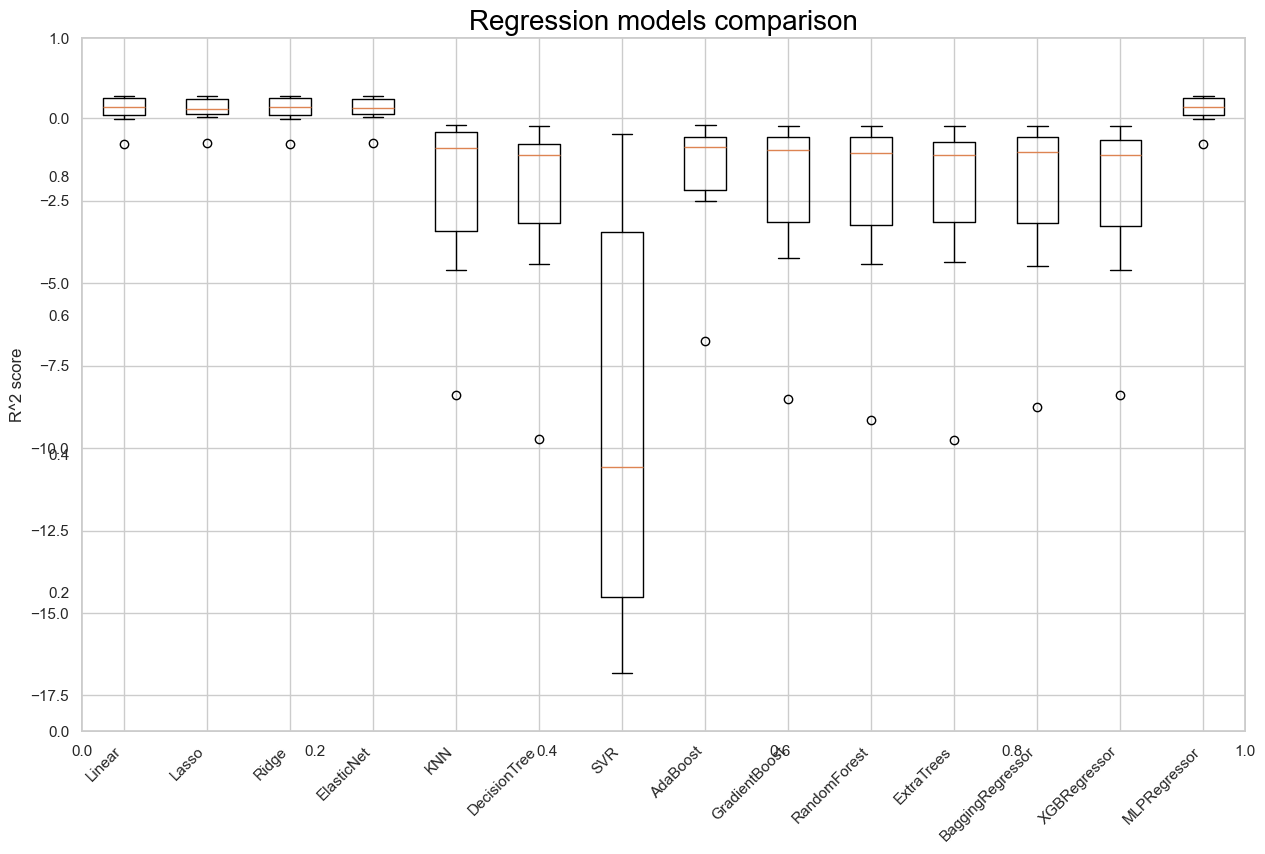

In [63]:
# Compare algorithms  

def box_compare():
  sns.set(rc={'figure.figsize':(15, 9)})
  sns.set_style(style='whitegrid', )
  figure = plt.figure()
  plt.title('Regression models comparison', color = 'black', fontsize = 20)
  axis = figure.add_subplot(111)
  plt.boxplot(model_results)
  axis.set_xticklabels(model_names, rotation = 45, ha="right")
  axis.set_ylabel("R^2 score")
  plt.margins(0.05, 0.1)

box_compare()
     

In [64]:
# Create Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)# Create Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

LinearRegression()

In [65]:

# Make predictions using the model
predictions = lr.predict(X_test)

In [66]:

# The coefficients
print('Coefficients: ', lr.coef_)
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(y_test, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(y_test, predictions), 3)))

Coefficients:  [1.00925444]
RMSE: 12.746
R^2 score: 0.685


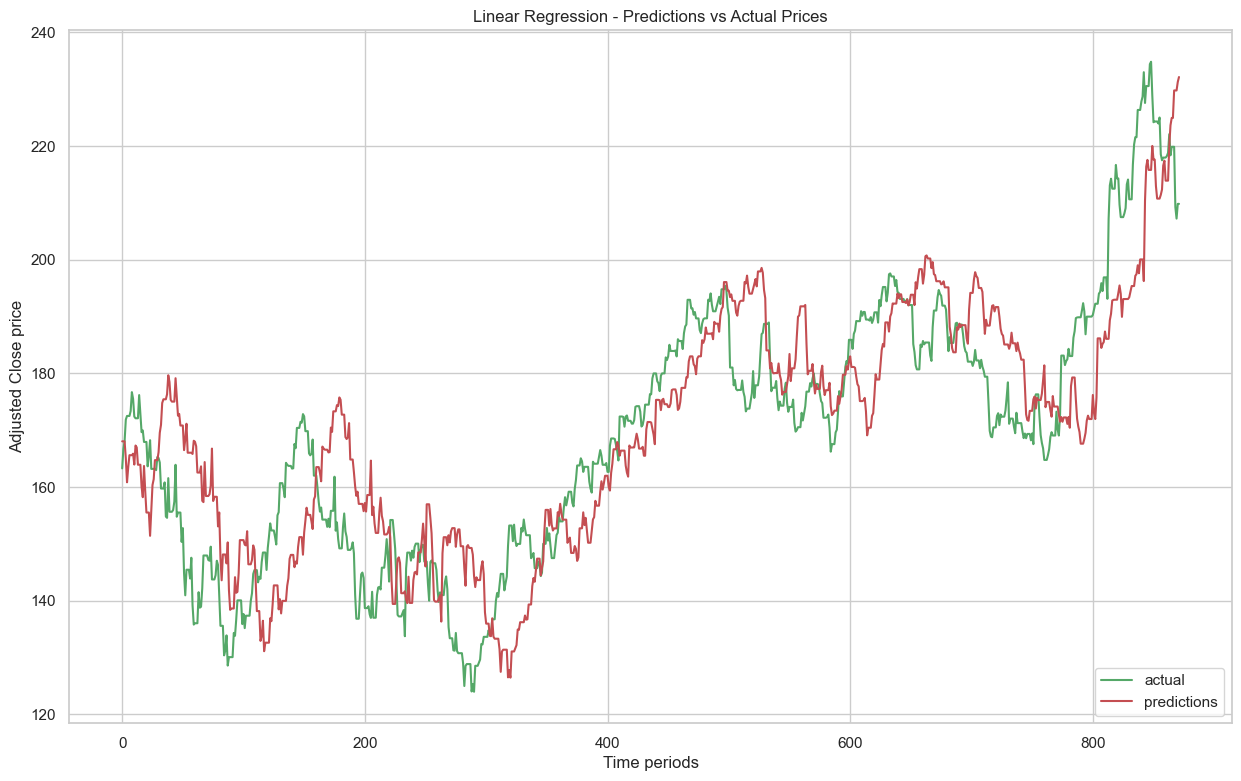

In [67]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, y_test, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('Linear Regression - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [68]:
pd.DataFrame({"Actual": y_test, "Predict": predictions}).head()


,Actual,Predict
0,163.290,168.050221
1,166.687,168.050221
2,168.059,168.050221
3,171.870,165.080994
4,172.512,160.845153


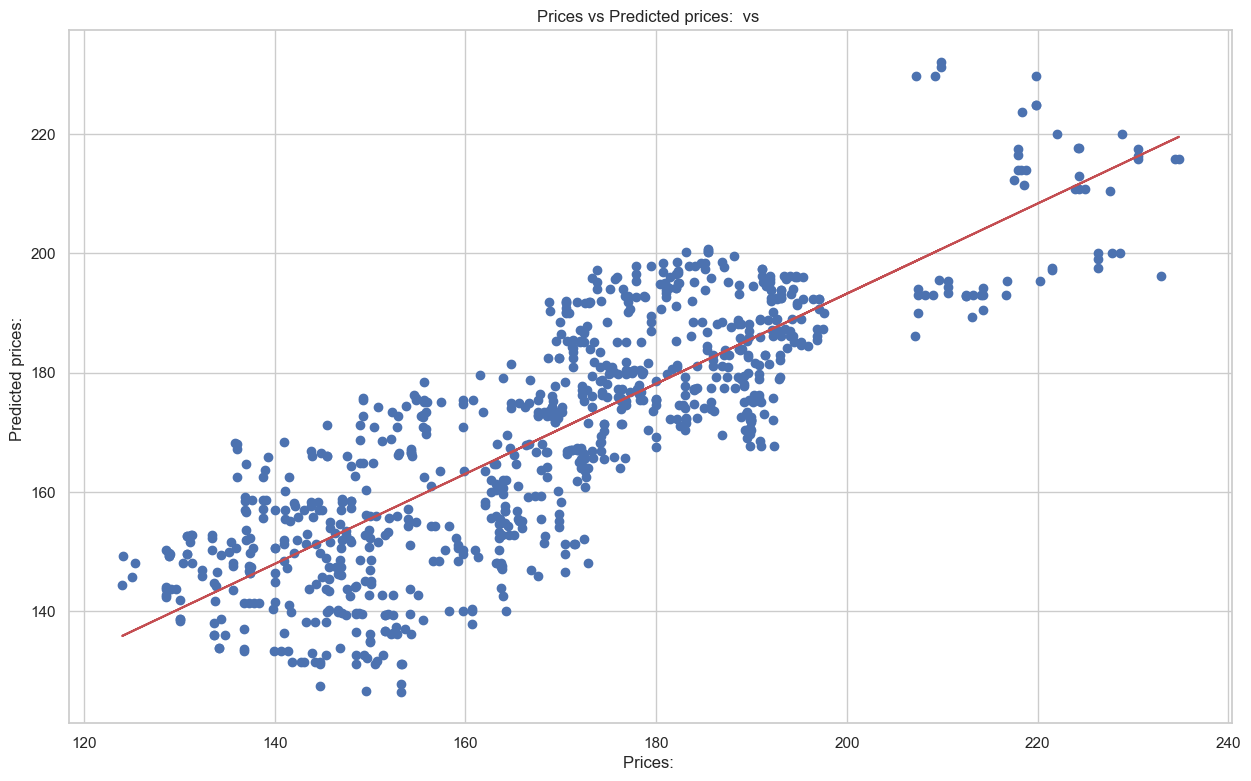

In [69]:
# create basic scatterplot
plt.scatter(y_test,predictions)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, predictions, 1)

# add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b, c='r')

plt.xlabel("Prices: ")
plt.ylabel("Predicted prices: ")
plt.title("Prices vs Predicted prices:  vs ")
plt.show()
     

In [70]:
# Prediction for next 30ndays

In [71]:
# Predicted prices

lr_prediction = lr.predict(X_forecast)
print(lr_prediction)

[236.47161604 231.01154952 234.00903521 234.00903521 234.00903521
 237.90475734 238.32864421 232.33367284 227.59017697 227.72138005
 227.72138005 227.72138005 227.368141   228.42785816 221.89798193
 220.83826477 221.31261436 221.31261436 221.31261436 221.5952056
 222.16038809 225.47074265 221.71631613 223.23019779 223.23019779
 223.23019779 212.54219328 210.48331422 213.09728322 213.09728322]


In [72]:
# Actual prices

X_forecast

array([[232.98],
       [227.57],
       [230.54],
       [230.54],
       [230.54],
       [234.4 ],
       [234.82],
       [228.88],
       [224.18],
       [224.31],
       [224.31],
       [224.31],
       [223.96],
       [225.01],
       [218.54],
       [217.49],
       [217.96],
       [217.96],
       [217.96],
       [218.24],
       [218.8 ],
       [222.08],
       [218.36],
       [219.86],
       [219.86],
       [219.86],
       [209.27],
       [207.23],
       [209.82],
       [209.82]])

In [73]:

# The coefficients
print('Coefficients: ', lr.coef_)
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, lr_prediction, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, lr_prediction), 3)))

Coefficients:  [1.00925444]
RMSE: 3.391
R^2 score: 0.782


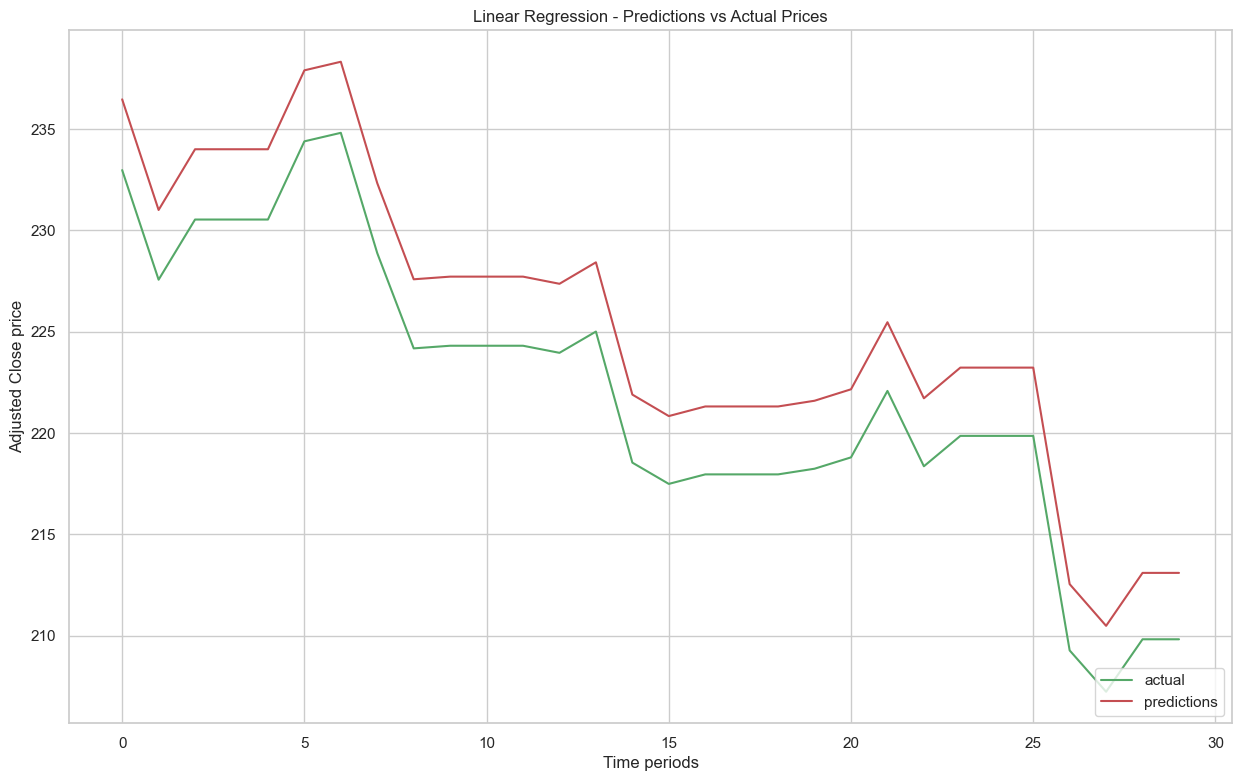

In [74]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, lr_prediction.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, lr_prediction, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('Linear Regression - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [75]:
# Reshape data to be 1D
X_forecast = X_forecast.reshape(-1)
X_forecast 

array([232.98, 227.57, 230.54, 230.54, 230.54, 234.4 , 234.82, 228.88,
       224.18, 224.31, 224.31, 224.31, 223.96, 225.01, 218.54, 217.49,
       217.96, 217.96, 217.96, 218.24, 218.8 , 222.08, 218.36, 219.86,
       219.86, 219.86, 209.27, 207.23, 209.82, 209.82])

In [76]:
pd.DataFrame({"Actual": X_forecast, "Predict": lr_prediction}).head()


,Actual,Predict
0,232.98,236.471616
1,227.57,231.011550
2,230.54,234.009035
3,230.54,234.009035
4,230.54,234.009035


In [77]:
# Hyper parameter optimisation

In [78]:
# Create dictionary of parameters
parameters = { 'fit_intercept': [True, False],
         'n_jobs': [None, -1]}

In [79]:
# Grid search to find best parameters
gridsearchcv_lr = GridSearchCV(estimator=lr, param_grid=parameters, cv=tscv, scoring='r2')
grid_result_lr = gridsearchcv_lr.fit(X_train, y_train)
print("Best: {} using {}".format(grid_result_lr.best_score_, grid_result_lr.best_params_))

Best: 0.2612464699011771 using {'fit_intercept': False, 'n_jobs': None}


In [80]:
# All of the best parameters for the optimal model

best_model_lr = grid_result_lr.best_estimator_
print(f"Best model has the following hyperparameters: {best_model_lr}")

Best model has the following hyperparameters: LinearRegression(fit_intercept=False)


In [81]:
# Reshape data to be 2D
X_forecast = X_forecast.reshape(-1,1)
X_forecast

array([[232.98],
       [227.57],
       [230.54],
       [230.54],
       [230.54],
       [234.4 ],
       [234.82],
       [228.88],
       [224.18],
       [224.31],
       [224.31],
       [224.31],
       [223.96],
       [225.01],
       [218.54],
       [217.49],
       [217.96],
       [217.96],
       [217.96],
       [218.24],
       [218.8 ],
       [222.08],
       [218.36],
       [219.86],
       [219.86],
       [219.86],
       [209.27],
       [207.23],
       [209.82],
       [209.82]])

In [82]:
# Create Linear Regression model
lr = LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None)

# Train the model using the training sets
lr.fit(X_train, y_train)

# Make predictions using the model
predictions = lr.predict(X_forecast)


# The coefficients
print('Coefficients: ', lr.coef_)
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, predictions), 3)))

Coefficients:  [1.02298469]
RMSE: 5.105
R^2 score: 0.505


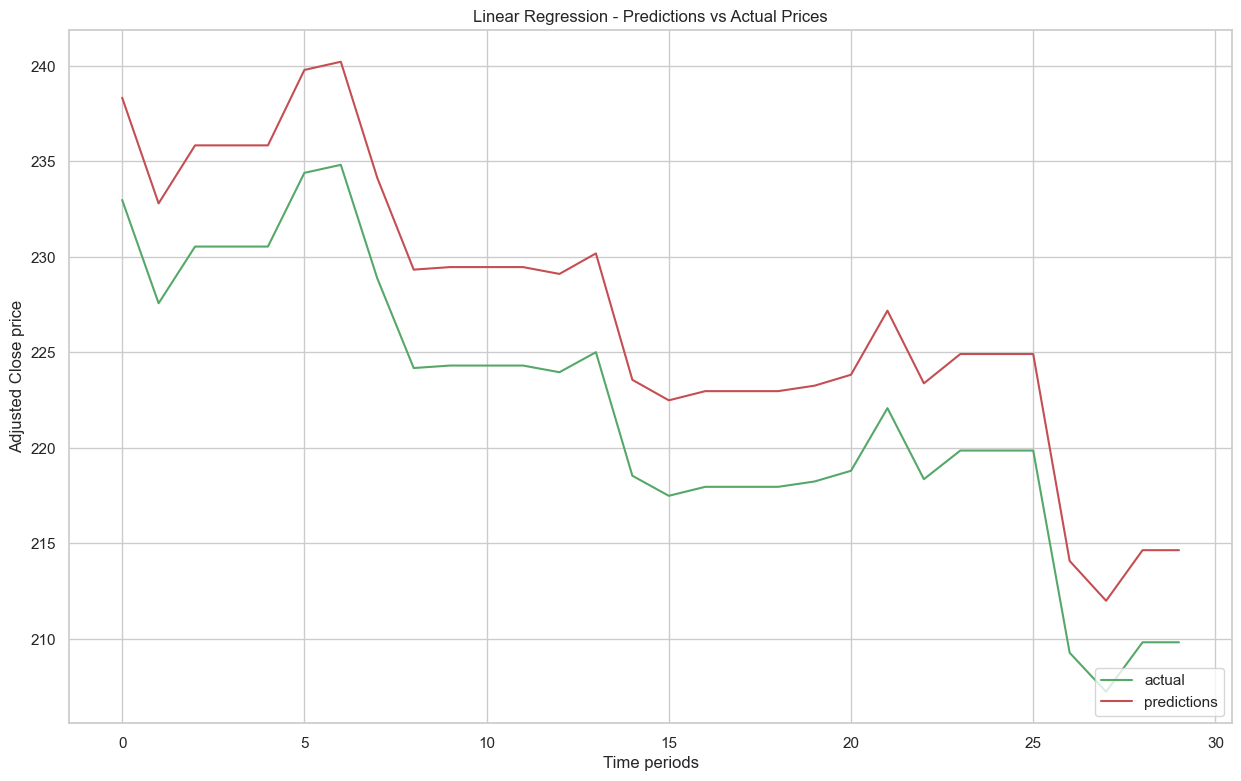

In [83]:
# Plot predictions against actual Adjusted Close prices  

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('Linear Regression - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [84]:
# MLP regressor

In [85]:

# Create an MLP Regressor model  
mlpr = MLPRegressor(max_iter=500, solver = 'lbfgs')

# Train the model using the training sets
mlpr.fit(X_train, y_train)
mlpr

MLPRegressor(max_iter=500, solver='lbfgs')

In [86]:

# Make predictions using the model
predictions = mlpr.predict(X_test)

In [87]:
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(y_test, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(y_test, predictions), 3)))

RMSE: 12.746
R^2 score: 0.685


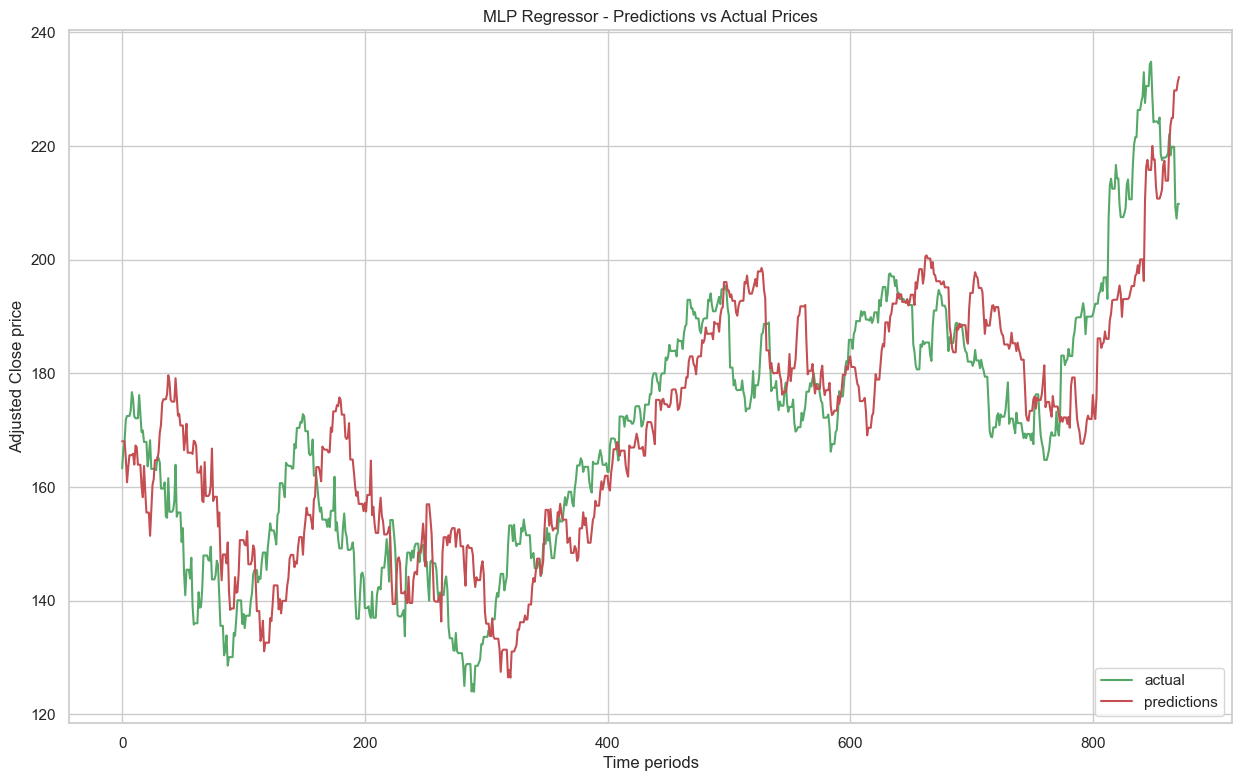

In [88]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, y_test, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [89]:
pd.DataFrame({"Actual": y_test, "Predict": predictions}).head()

,Actual,Predict
0,163.290,168.050220
1,166.687,168.050220
2,168.059,168.050220
3,171.870,165.080993
4,172.512,160.845152


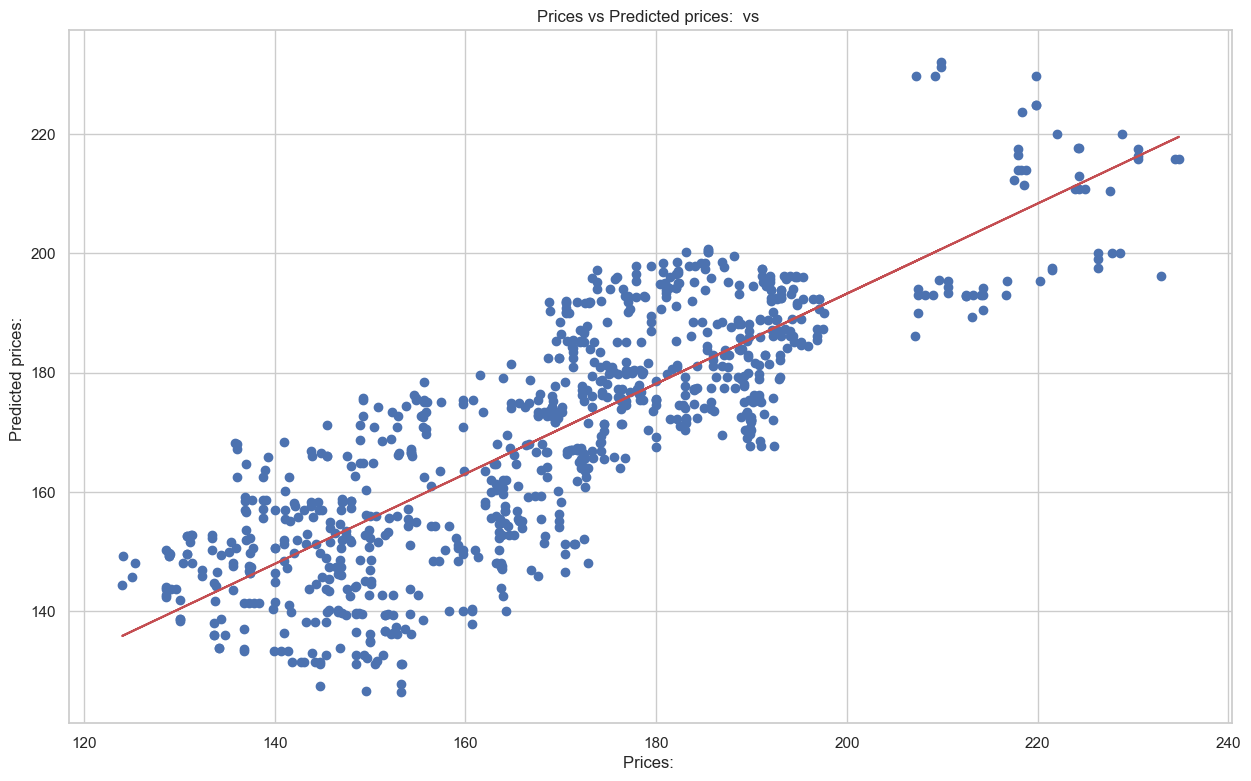

In [90]:
# create basic scatterplot
plt.scatter(y_test,predictions)

# obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_test, predictions, 1)

# add linear regression line to scatterplot 
plt.plot(y_test, m*y_test+b, c='r')

plt.xlabel("Prices: ")
plt.ylabel("Predicted prices: ")
plt.title("Prices vs Predicted prices:  vs ")
plt.show()

In [91]:
# Predicted prices

mlpr_prediction = mlpr.predict(X_forecast)
print(mlpr_prediction)

[236.47161489 231.01154841 234.00903408 234.00903408 234.00903408
 237.90475619 238.32864305 232.33367172 227.59017588 227.72137896
 227.72137896 227.72137896 227.36813991 228.42785706 221.89798088
 220.83826372 221.31261331 221.31261331 221.31261331 221.59520455
 222.16038703 225.47074157 221.71631508 223.23019673 223.23019673
 223.23019673 212.54219228 210.48331324 213.09728222 213.09728222]


In [92]:
print(X_forecast)

[[232.98]
 [227.57]
 [230.54]
 [230.54]
 [230.54]
 [234.4 ]
 [234.82]
 [228.88]
 [224.18]
 [224.31]
 [224.31]
 [224.31]
 [223.96]
 [225.01]
 [218.54]
 [217.49]
 [217.96]
 [217.96]
 [217.96]
 [218.24]
 [218.8 ]
 [222.08]
 [218.36]
 [219.86]
 [219.86]
 [219.86]
 [209.27]
 [207.23]
 [209.82]
 [209.82]]


In [93]:
# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, mlpr_prediction, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, mlpr_prediction), 3)))

RMSE: 3.39
R^2 score: 0.782


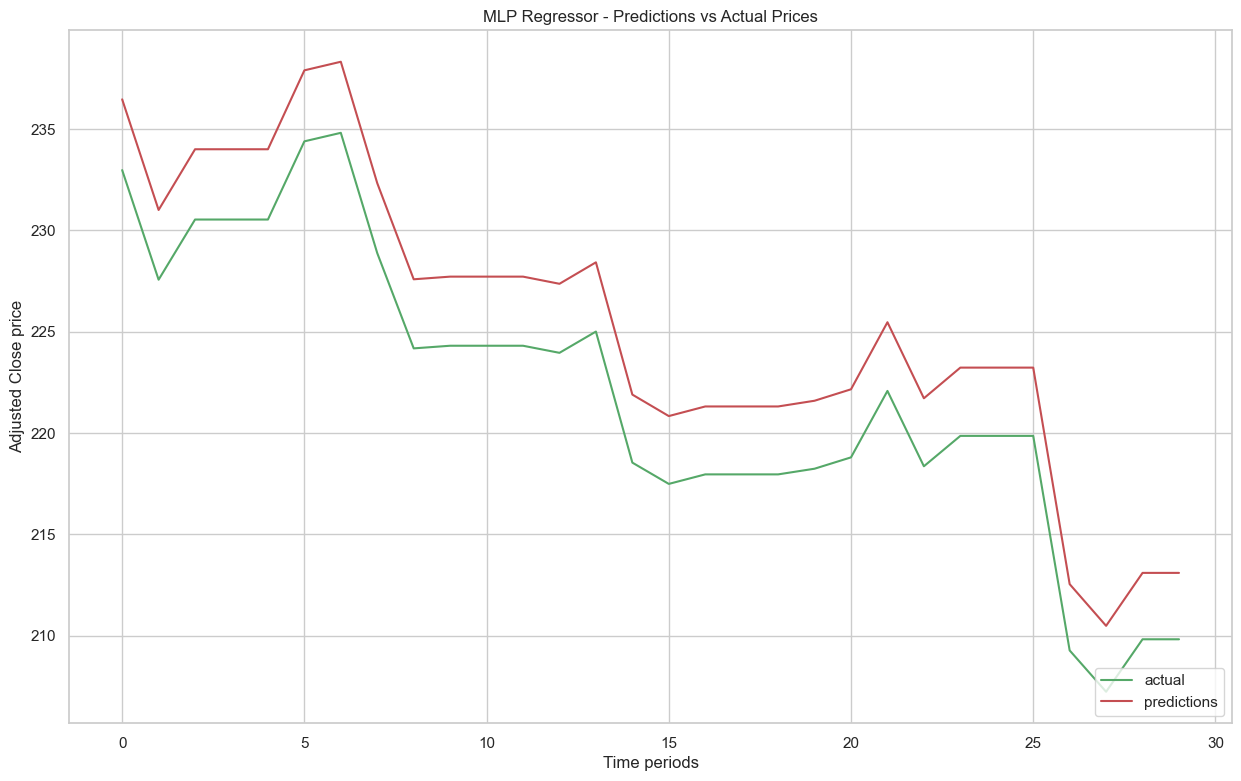

In [94]:
# Plot predictions against actual Adjusted Close prices 

x_axis = np.array(range(0, mlpr_prediction.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, mlpr_prediction, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()

In [95]:
# Reshape data to be 1D
X_forecast = X_forecast.reshape(-1)

In [96]:
pd.DataFrame({"Actual": X_forecast, "Predict": mlpr_prediction}).head()

,Actual,Predict
0,232.98,236.471615
1,227.57,231.011548
2,230.54,234.009034
3,230.54,234.009034
4,230.54,234.009034


In [97]:
# Reshape data as this needs to be 2D
y_train = y_train.reshape(-1, 1)

In [98]:
# Normalise data to improve convergence

scaler = MinMaxScaler(feature_range=(0, 1))
X_train_norm = scaler.fit_transform(X_train)
y_train_norm = scaler.transform(y_train)
X_test_norm = scaler.transform(X_test)

In [99]:
# Create model

mlpr = MLPRegressor(max_iter=500)

In [100]:
# Create dictionary of parameters to iterate over

parameters = {"hidden_layer_sizes": [(50,50,50), (50,100,50), (100,)],
              "activation": ["identity", "logistic", "tanh", "relu"], 
              "solver": ["lbfgs", "sgd", "adam"], 
              "alpha": [0.0001, 0.05], 
              "learning_rate": ['constant','adaptive']}

In [101]:
# Grid search to find best parameters

gridsearchcv_mlpr = GridSearchCV(estimator=mlpr, param_grid=parameters, cv=tscv, scoring='r2')
grid_result_mlpr = gridsearchcv_mlpr.fit(X_train_norm, y_train_norm)
print("Best: {} using {}".format(grid_result_mlpr.best_score_, grid_result_mlpr.best_params_))

Best: 0.2859525183190927 using {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'lbfgs'}


In [102]:
# All of the best parameters for the optimal model  

best_model_mlpr = grid_result_mlpr.best_estimator_
print(f"Best model has the following hyperparameters: {best_model_mlpr}")

Best model has the following hyperparameters: MLPRegressor(activation='tanh', hidden_layer_sizes=(50, 50, 50), max_iter=500,
             solver='lbfgs')


In [103]:
# Reshape data to be 2D
X_forecast = X_forecast.reshape(-1,1)
X_forecast

array([[232.98],
       [227.57],
       [230.54],
       [230.54],
       [230.54],
       [234.4 ],
       [234.82],
       [228.88],
       [224.18],
       [224.31],
       [224.31],
       [224.31],
       [223.96],
       [225.01],
       [218.54],
       [217.49],
       [217.96],
       [217.96],
       [217.96],
       [218.24],
       [218.8 ],
       [222.08],
       [218.36],
       [219.86],
       [219.86],
       [219.86],
       [209.27],
       [207.23],
       [209.82],
       [209.82]])

In [104]:
# Create MLP Regression model  
mlpr = MLPRegressor(activation='relu', alpha=0.05, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100,), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=500,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='lbfgs',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

# Train the model using the training sets
mlpr.fit(X_train, y_train)

# Make predictions using the model
predictions = mlpr.predict(X_forecast)

# The mean squared error
print('RMSE: {}'.format(round(mean_squared_error(X_forecast, predictions, squared=False), 3)))
# Explained variance score: 1 is perfect prediction, 0 is random
print('R^2 score: {}'.format(round(r2_score(X_forecast, predictions), 3)))
     

RMSE: 3.39
R^2 score: 0.782


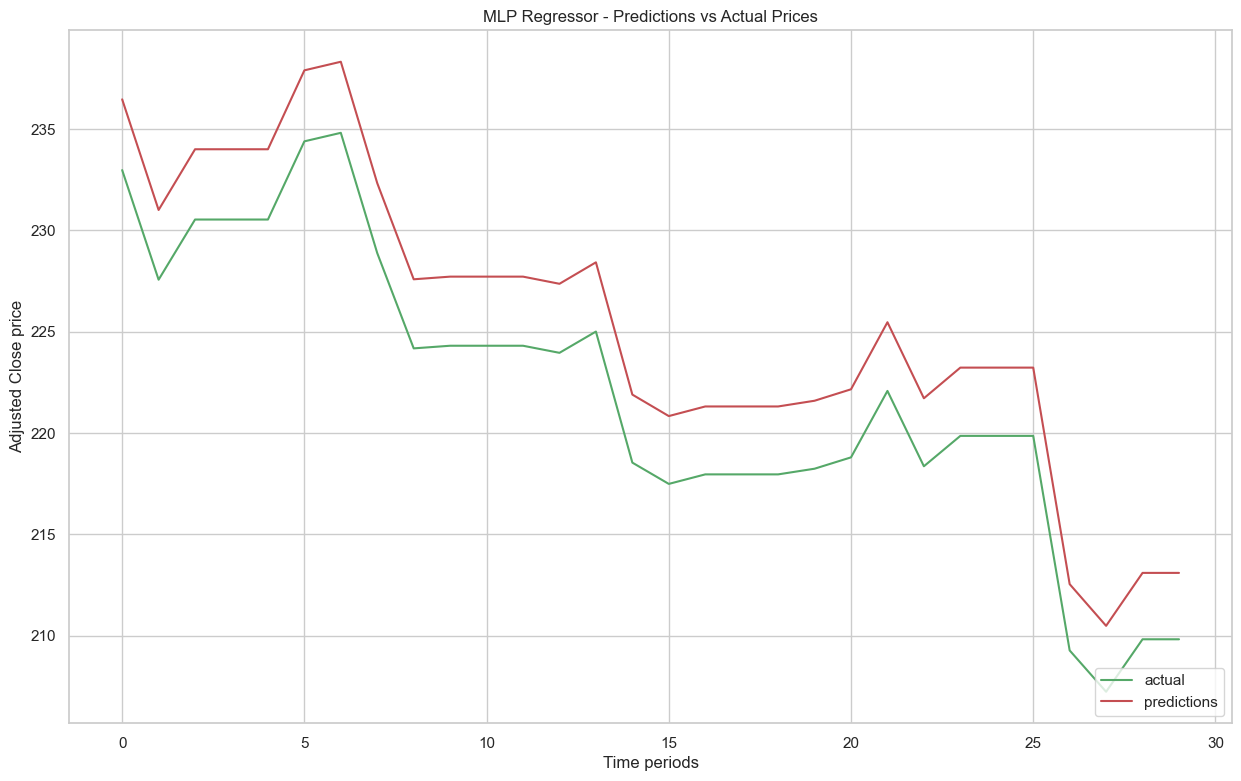

In [105]:
# Plot predictions against actual Adjusted Close prices

x_axis = np.array(range(0, predictions.shape[0]))
plt.plot(x_axis, X_forecast, color='g', label="actual")
plt.plot(x_axis, predictions, color='r', label="predictions")
plt.xlabel('Time periods')
plt.ylabel('Adjusted Close price')
plt.title('MLP Regressor - Predictions vs Actual Prices')
plt.legend(loc='lower right')
plt.show()
     